In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Loading the dataset from CSV file to Pandas DataFrame
titanic_data = pd.read_csv("titanic.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Getting some information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Finding missing values 
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# As total rows are 891,and 687 rows value is missing of the 'Cabin' column,so we dropped this column from the dataset
titanic_data.drop(columns=['Cabin'],axis=1,inplace=True)

# Replacing the missing values in 'Age' column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [6]:
# Finding the mode value of 'Embarked' column
titanic_data['Embarked'].mode()[0]

'S'

In [7]:
# Replacing the missing values in 'Embarked' column with mean value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [8]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
# Finding duplicates value
titanic_data.duplicated().sum()

0

In [10]:
# Statistical information about the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Number of entities of the target column
titanic_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
# Grouping the target column variable
titanic_data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.415100,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.549778,0.473684,0.464912,48.395408


# Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

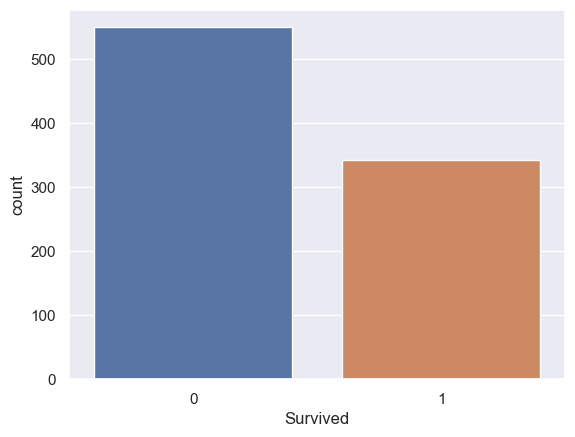

In [13]:
# Visualizing target column entities
sns.set()
sns.countplot(x='Survived',data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

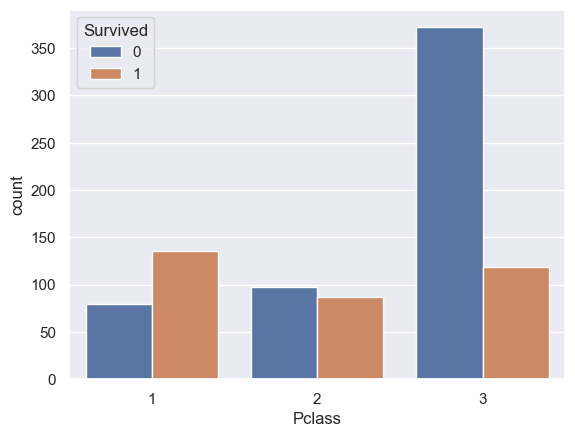

In [14]:
# Pclass vs Survived column
sns.set()
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

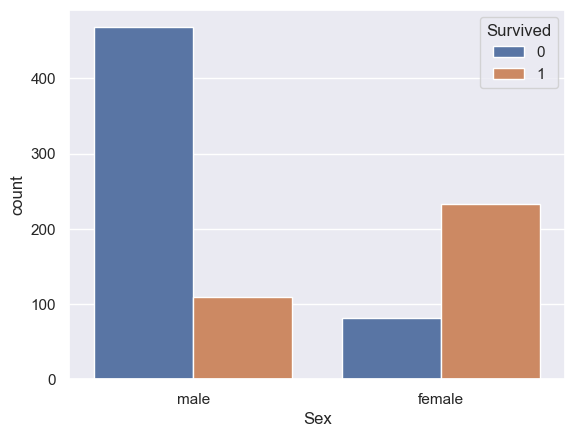

In [15]:
# Sex vs Survived column
sns.set()
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

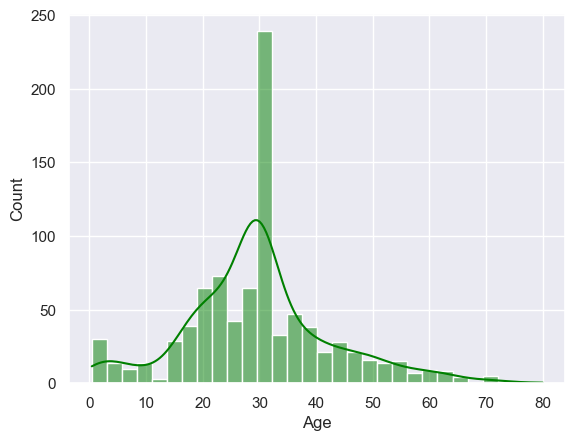

In [16]:
# Distribution of the "Age" column
sns.set()
sns.histplot(titanic_data['Age'],kde=True,color='green')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

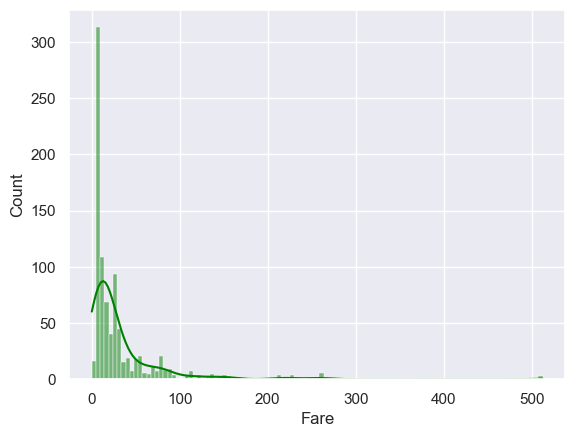

In [17]:

# Distribution of the "Fare" column
sns.set()
sns.histplot(titanic_data['Fare'],kde=True,color='green')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

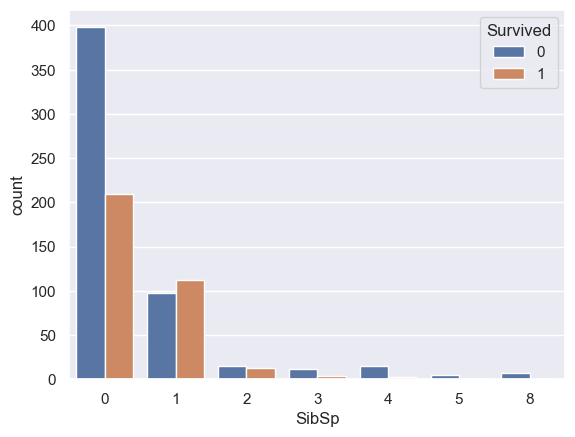

In [18]:
# SibSp vs Survived column
sns.set()
sns.countplot(x='SibSp',hue='Survived',data=titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

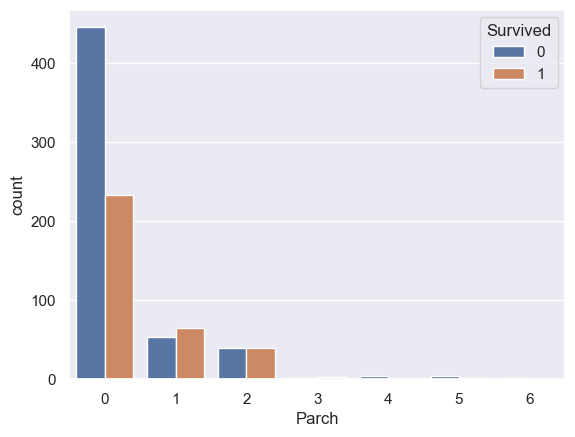

In [19]:
# Parch vs Survived column
sns.set()
sns.countplot(x='Parch',hue='Survived',data=titanic_data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

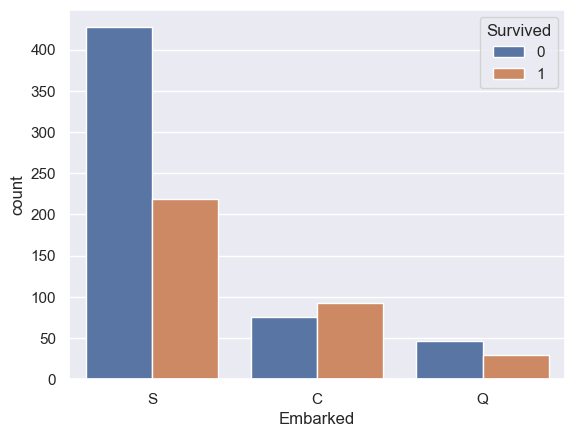

In [20]:
# Embarked vs Survived column
sns.set()
sns.countplot(x='Embarked',hue='Survived',data=titanic_data)

<AxesSubplot:>

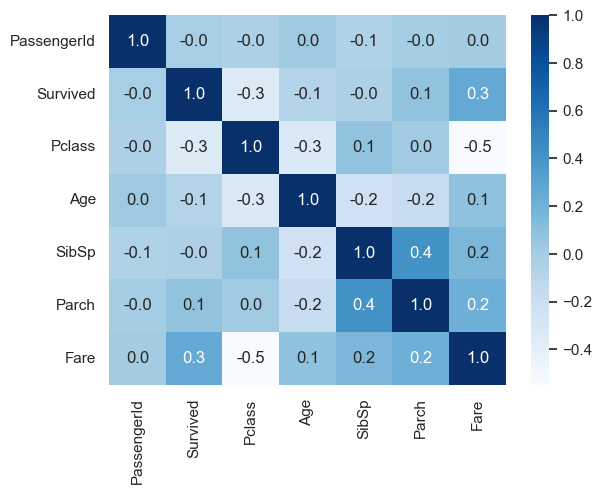

In [21]:
# Correlation of each column
correlation = titanic_data.corr()

sns.set()
sns.heatmap(correlation,annot=True,fmt='.1f',cbar=True,cmap="Blues")

In [22]:
# LabelEncodding for categorical column
titanic_data['Sex'].replace({'female':0,"male":1},inplace = True)
titanic_data['Embarked'].replace({'S':0,"C":1,"Q":3},inplace = True)

In [23]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1


In [24]:
# Extracting Independent and Dependent valriable
x = titanic_data.drop(columns=['PassengerId','Survived','Name','Ticket'],axis=1)
y = titanic_data['Survived']

In [25]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,0
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,0
3,1,0,35.000000,1,0,53.1000,0
4,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0
887,1,0,19.000000,0,0,30.0000,0
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [28]:
print(titanic_data.shape,x_train.shape,x_test.shape)

(891, 11) (712, 7) (179, 7)


# Training the Logistic Regression Model with train data

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Tanvir Ahmed\.conda\envs\dl\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# Model Evaluation

In [30]:
# Predicting training dataset
predicted_train_data = model.predict(x_train)
predicted_train_data

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [31]:
# Checking the accuray of training data 
from sklearn.metrics import accuracy_score
score = accuracy_score(predicted_train_data,y_train)
print("Training Data Accuracy:",score)

Training Data Accuracy: 0.8033707865168539


In [32]:
# R Squared Error
from sklearn.metrics import r2_score
r_squared_error = accuracy_score(y_train,predicted_train_data)
print("R Squared Error for Training Data:",r_squared_error)

R Squared Error for Training Data: 0.8033707865168539


In [33]:
# Mean Squared Error
from sklearn.metrics import r2_score
mean_error = accuracy_score(y_train,predicted_train_data)
print("Mean Squared Error for Training Data:",mean_error)

Mean Squared Error for Training Data: 0.8033707865168539


In [34]:
# Predicting test dataset
predicted_test_data = model.predict(x_test)
predicted_test_data

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [35]:
# Checking the accuray of test data 
from sklearn.metrics import accuracy_score
score = accuracy_score(predicted_test_data,y_test)
print("Test Data Accuracy:",score)

Test Data Accuracy: 0.7877094972067039


In [36]:
# R Squared Error
from sklearn.metrics import r2_score
r_squared_error = accuracy_score(predicted_test_data,y_test)
print("R Squared Error for Test Data:",r_squared_error)

R Squared Error for Test Data: 0.7877094972067039


In [37]:
# Mean Squared Error
from sklearn.metrics import r2_score
mean_error = accuracy_score(predicted_test_data,y_test)
print("Mean Squared Error for Training Data:",mean_error)

Mean Squared Error for Training Data: 0.7877094972067039


# Creating confusion matrix and visualizing

<AxesSubplot:>

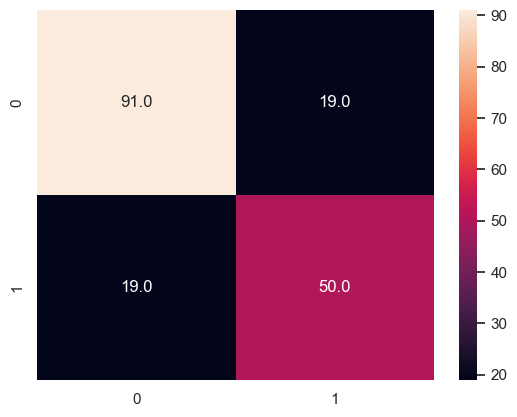

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_test_data,y_test)

sns.set()
sns.heatmap(cm,annot=True,fmt='.1f')

# Creating a Predictive System

In [40]:
# Getting input
input_data = (1,0,38,1,0,71.2833,1)

# Converting input_data to numpy array
numpy_input_data = np.asarray(input_data)

# Reshaping the numpy array
reshaped_numpy_input_array = numpy_input_data.reshape(1,-1)

prediction = model.predict(reshaped_numpy_input_array)

if prediction[0] == 0:
    print("The Person was alive.")
else:
    print("The Person was not alive.")

The Person was not alive.
